#Deep Learning Pipeline
- Data
- Model
- Loss
- Training Process

#Tensor

In [2]:
# To use PyTorch
import torch

In [3]:
# How to create tensor
tensor = torch.tensor(data=[[1, 2, 3], [4, 5, 6]], dtype=torch.float, device='cpu', requires_grad=False)

# dtype 옵션 지정하는 이유 => 연산 오류 막기 위함
# device 또한 모델이 실행될 위치와 일정하게 맞춰주어야 함(cpu, gpu)


print(f'Tensor from List\n{tensor}')

Tensor from List
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [4]:
# How to create special tensor 1
tensor_ones = torch.ones_like(input=tensor) #2*3의 Tensor
tensor_rand = torch.rand_like(input=tensor)

print(f'Ones Tensor\n{tensor_ones}\n')
print(f'Random Tensor\n{tensor_rand}')

Ones Tensor
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random Tensor
tensor([[0.1433, 0.3065, 0.5426],
        [0.3711, 0.4122, 0.9354]])


In [6]:
# How to create special tensor 2
shape = (2, 3,)
# Masking시에 사용가능

ones_tensor = torch.ones(shape) # 구성 요소가 모두 1
rand_tensor = torch.rand(shape) # Random 값으로 채워넣는다
zeros_tensor = torch.zeros(shape) # 구성 요소가 모두 0


print(f'Ones Tensor\n{ones_tensor}\n')
print(f'Random Tensor\n{rand_tensor}\n')
print(f'Zeros Tensor\n{zeros_tensor}')

Ones Tensor
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random Tensor
tensor([[0.9823, 0.7276, 0.1201],
        [0.4058, 0.5264, 0.7355]])

Zeros Tensor
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
# Tensor's Attribute
tensor = torch.rand(3, 4)

print(f'Shape of tensor: {tensor.shape}') # 차원을 파악하는 것이 중요함
print(f'Dtype of tensor: {tensor.dtype}')
print(f'Device of tensor: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Dtype of tensor: torch.float32
Device of tensor: cpu


In [8]:
# How to combine tensors
tensor = torch.zeros((3, 2)) # 텐서의 크기 

#concatenation
tensor_cat0 = torch.cat([tensor, tensor, tensor], dim=0) 
tensor_cat1 = torch.cat([tensor, tensor], dim=1)

#Stack
tensor_stack = torch.stack([tensor, tensor, tensor, tensor]) # dim의 default : 0

print(f'concat dim=0: {tensor_cat0.shape}')
print(f'concat dim=1: {tensor_cat1.shape}')
print(f'stack: {tensor_stack.shape}')

concat dim=0: torch.Size([9, 2])
concat dim=1: torch.Size([3, 4])
stack: torch.Size([4, 3, 2])


#Data

In [9]:
# How to use built-in dataset
from torchvision import datasets, transforms

#torch dataset => vision, text, audio

# Dataset
# training dataset
train_dataset = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
# root: 저장장소
# train : Train 용도인지 확인
# ToTensor : 이미지를 텐서로 변경
# Download : 반드시 지정

# evaluation dataset
val_dataset = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [10]:
# How to create dataloader
from torch.utils.data import DataLoader

# DataLoader : Data를 넣어준다
# DataLoader 사용하는 이유 : Batch를 반복하며 전체 데이터셋에 대해 전부 적용

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)
# shuffle : Train하는 경우 True

val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False
)

for inputs, labels in train_dataloader:
    print(f'Inputs : {inputs.shape}')
    print(f'Labels : {labels.shape}')
    break

# 64(Batch Size)

Inputs : torch.Size([64, 1, 28, 28])
Labels : torch.Size([64])


Label: 0


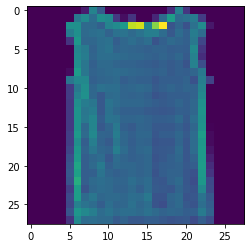

In [11]:
import random
import matplotlib.pyplot as plt

def Tensor2Image(tensor):
    image = tensor.numpy()
    plt.imshow(image.reshape(28, 28))

n = random.randint(0, 1000)

input, label = train_dataset[n]

print(f'Label: {label}')
Tensor2Image(input)

#Model

In [12]:
# To create neural network
import torch.nn as nn # nn : Neural Network

In [13]:
flatten = nn.Flatten()
# flatten : 28*28 => 일렬로 늘어뜨린다

tensor = torch.ones(64, 1, 28, 28)
print(f'Before: {tensor.shape}') #[64, 1, 28, 28]

tensor = flatten(tensor)
print(f'After: {tensor.shape}') # [64, 784]

Before: torch.Size([64, 1, 28, 28])
After: torch.Size([64, 784])


In [14]:
linear = nn.Linear(784, 512) # 784*512 + 512개의 Parameter 존재
# Linear : MLP를 구성하는 하나의 Layer

print(f'Before: {tensor.shape}') 

tensor = linear(tensor) #64장에 대한 784개의 숫자를 64장에 대한 512개의 숫자로 바꿔준다.
print(f'After: {tensor.shape}')

Before: torch.Size([64, 784])
After: torch.Size([64, 512])


In [15]:
relu = nn.ReLU()
# ReLU : Activation Function
tensor = torch.tensor([[0.8908, -0.1784], [-0.3282, 0.4263]])
print(f'Before\n{tensor}')

tensor = relu(tensor)
print(f'After\n{tensor}') # ReLU 적용결과 : 음수는 0으로, 양수는 그대로

Before
tensor([[ 0.8908, -0.1784],
        [-0.3282,  0.4263]])
After
tensor([[0.8908, 0.0000],
        [0.0000, 0.4263]])


In [16]:
# How to create single network
# 모든 모듈은 nn.Module을 상속받아서 사용
# 왜 상속해서 사용하는가 : 연산이 이루어지는 과정을 기록하고 이를 Gradient Descent 계산 과정에서 사용하게 된다.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() 
        
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
# Sequential : 순차적으로 통과시킴
# 최종 차원 : 64*10
# init : 모델 자체를 정의한다.

    def forward(self, inputs):
        return self.network(inputs)

# forward : 연산 진행 과정을 정의한다.

test_input = torch.ones(64, 1, 28, 28)
test_network = NeuralNetwork()
test_output = test_network(test_input)

print(f'Input: {test_input.shape}')
print(f'Output: {test_output.shape}') # 64장의 사진에 대해서 10개의 Prediction

Input: torch.Size([64, 1, 28, 28])
Output: torch.Size([64, 10])


In [17]:
# How to use network as a block
# 위와 동일 의미
class NeuralBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        self.block = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.ReLU()
        )
    
    def forward(self, inputs):
        return self.block(inputs)

class NeuralNetworkV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Flatten(),
            NeuralBlock(28 * 28, 512),
            NeuralBlock(512, 512),
            NeuralBlock(512, 512),
            nn.Linear(512, 10)
        )

    def forward(self, inputs):
        return self.network(inputs)

test_input = torch.ones(64, 1, 28, 28)
test_network = NeuralNetworkV2()
test_output = test_network(test_input)

print(f'Input: {test_input.shape}')
print(f'Output: {test_output.shape}')

Input: torch.Size([64, 1, 28, 28])
Output: torch.Size([64, 10])


In [18]:
print(test_network)

NeuralNetworkV2(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): NeuralBlock(
      (block): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (2): NeuralBlock(
      (block): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (3): NeuralBlock(
      (block): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


#Loss

In [19]:
# Loss comparison
criterion = nn.CrossEntropyLoss() # crossEntrophyLoss -> Classification에서 사용함

test_outputs0 = torch.tensor([[1, 2 ,3], [2, 3, 1]], dtype=torch.float)
test_outputs1 = torch.tensor([[3, 2, 1], [1, 2, 3]], dtype=torch.float)
test_labels = torch.tensor([0, 2])

loss0 = criterion(test_outputs0, test_labels)
loss1 = criterion(test_outputs1, test_labels)

print(f'Loss 0: {loss0}')
print(f'Loss 1: {loss1}')

Loss 0: 2.4076058864593506
Loss 1: 0.40760594606399536


#Training Process

In [ ]:
#Train과 Evaluation 각각 한번씩 반복한다

import torch.optim as optim
from tqdm import tqdm

In [ ]:
def train_one_epoch(model, dataloader, criterion, optimizer, device): # epoch : 한번의 데이터를 전체 다 보는 횟수
    model.train() # 하나의 옵션 지정(ex. dropout)

    train_loss = 0.0
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # model과 input을 동일한 device에 저장
        
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and gradient descent
        optimizer.zero_grad() # 이전 배치의 Gradient 초기화한다
        loss.backward() # Gradient 계산
        optimizer.step() # Gradient를 따라서 이동한다

        train_loss += loss.item()
    
    print(f'Train Loss: {train_loss}')

In [ ]:
def eval_one_epoch(model, dataloader, criterion, device):
    model.eval()

    eval_loss = 0.0
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward
        with torch.no_grad(): # 함수 torch.no_grad() : Gradient를 계산하지 않음 => Forward 시 Gradient 계산하지 않음
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        eval_loss += loss.item()
    
    print(f'Eval Loss: {eval_loss}')

In [ ]:
def train(epochs):
    net = NeuralNetwork()

    optimizer = optim.SGD(params=net.parameters(), lr=1e-3) 
    
    # optimizer 설정 : net내의 weight를 관리한다.+ 한번 반복 후 초기화
    # net.parameters() 옵션을 지정해줘야함

    # Use Accelerator
    device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPU 사용할 수 있을 시 cuda

    print(f'Device : {device}')

    net = net.to(device) #network와 data를 하나의 device에서 학습할 수 있도록

    for epoch in range(epochs):
        print(f'Epoch : {epoch + 1} ==============================')
        train_one_epoch(
            model=net,
            dataloader=train_dataloader,
            criterion=criterion,
            optimizer=optimizer,
            device=device
        )
        eval_one_epoch(
            model=net,
            dataloader=val_dataloader,
            criterion=criterion,
            device=device
        )
    torch.save(net.state_dict(), 'network.pth') #network를 저장하는 코드

train(5)

Device : cuda
Epoch : 1 ==============================


100%|██████████| 938/938 [00:06<00:00, 135.66it/s]


Train Loss: 2141.367001771927


100%|██████████| 157/157 [00:00<00:00, 165.49it/s]


Eval Loss: 355.806649684906
Epoch : 2 ==============================


100%|██████████| 938/938 [00:06<00:00, 139.06it/s]


Train Loss: 2103.089649438858


100%|██████████| 157/157 [00:00<00:00, 163.15it/s]


Eval Loss: 347.21812415122986
Epoch : 3 ==============================


100%|██████████| 938/938 [00:06<00:00, 137.03it/s]


Train Loss: 2023.8497591018677


100%|██████████| 157/157 [00:00<00:00, 165.86it/s]


Eval Loss: 327.6778995990753
Epoch : 4 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.57it/s]


Train Loss: 1843.2538604736328


100%|██████████| 157/157 [00:01<00:00, 105.09it/s]


Eval Loss: 285.7288906574249
Epoch : 5 ==============================


100%|██████████| 938/938 [00:07<00:00, 119.62it/s]


Train Loss: 1550.9986325502396


100%|██████████| 157/157 [00:00<00:00, 163.58it/s]

Eval Loss: 236.31706070899963


#Test

In [ ]:
# How to compute proba
softmax = nn.Softmax(dim=1)

test_output = torch.tensor([
    [1, 2, 3],
    [2, 4, 6],
], dtype=torch.float)

print(softmax(test_output))

tensor([[0.0900, 0.2447, 0.6652],
        [0.0159, 0.1173, 0.8668]])


label : 9


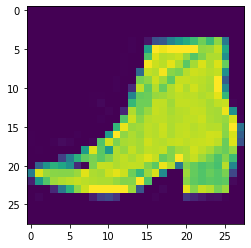

In [ ]:
# Random sample
n = random.randint(0, len(val_dataset) - 1)

test_input, test_label = val_dataset[n]

print(f'label : {test_label}')
Tensor2Image(test_input)

In [ ]:
# Untrained Network
net = NeuralNetwork()

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax() # 가장 큰 확률의 인덱스번호를 확인한다

print(test_output)
print(test_prob)
print(test_predict)

tensor([[ 0.0316,  0.0194, -0.0232, -0.0813,  0.0476, -0.0661,  0.0144, -0.0496,
          0.0268,  0.0435]], grad_fn=<AddmmBackward0>)
tensor([[0.1035, 0.1022, 0.0980, 0.0924, 0.1052, 0.0939, 0.1017, 0.0954, 0.1030,
         0.1047]], grad_fn=<SoftmaxBackward0>)
tensor(4)


In [ ]:
# Trained Network
net.load_state_dict(torch.load('network.pth'))

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax()

print(test_output)
print(test_prob)
print(test_predict)

tensor([[-1.8027, -2.5062, -0.2492, -2.3445, -0.2869,  1.0089, -0.5627,  1.8372,
          2.0607,  2.9393]], grad_fn=<AddmmBackward0>)
tensor([[0.0043, 0.0021, 0.0204, 0.0025, 0.0196, 0.0718, 0.0149, 0.1643, 0.2054,
         0.4946]], grad_fn=<SoftmaxBackward0>)
tensor(9)
